In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/mercadeo_bancario.csv")
df.head(10)
#print(df.shape)


,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1
5,30,management,divorced,preschool,6,yes,yes,no,499476,75,1,cellular,jul,tue,68,90,0,1553,0
6,37,blue-collar,married,preschool,6,no,yes,no,86520,0,5,cellular,may,thu,204,66,0,442,0
7,39,blue-collar,divorced,tecnical_school,4,no,yes,no,176081,0,1,cellular,may,fri,191,51,0,495,0
8,36,admin.,married,university.degree,6,no,no,no,0,0,3,cellular,jun,mon,174,0,1,1097,1
9,27,blue-collar,single,preschool,3,no,yes,no,323709,0,1,cellular,apr,thu,191,33,1,414,0


In [189]:
df.dtypes

edad                         int64
trabajo                     object
estado_civil                object
educacion                   object
total_hijos                  int64
credito_sin_pago            object
prestamo_vivienda           object
prestamo_personal           object
valor_prestamo               int64
dias_ultimo_pago             int64
tarjetas_credito             int64
contacto                    object
mes                         object
dia_semana                  object
duracion_ultimo_contacto     int64
dias_ultimo_contacto         int64
anterior_contacto            int64
numero_empleados             int64
si_no                        int64
dtype: object

In [200]:
valores_trabajo = {'trabajo':{'blue-collar':1, 'technician':2, 'management':3, 'services':4, 'retired':5,
       'admin.':6, 'housemaid':7, 'unemployed':8, 'entrepreneur':9,
       'self-employed':10, 'unknown':11, 'student':12 }}

valores_estado_civil = {'estado_civil ':{'married':1, 'single':2, 'divorced':3, 'unknown':4}}

valores_educacion = {'educacion':{'preschool':1, 'unknown':2, 'university.degree':3,
       'Technological_school':4, 'tecnical_school':5, 'professional.course':6,
       'primary_school':7, 'illiterate':8}}   

valores_credito_sin_pago = {'credito_sin_pago':{'unknown':0, 'no':1, 'yes':2}} 

valores_prestamo_vivienda = {'prestamo_vivienda':{'yes':2, 'no':1, 'unknown':0}}          

valores_prestamo_personal = {'prestamo_personal':{'yes':2, 'no':1, 'unknown':0}}  

valores_contacto = {'contacto':{'cellular':0, 'telephone':1}}

valores_mes = {'mes':{'aug':8, 'nov':11, 'jun':6, 'apr':4, 'jul':6, 'may':5, 'oct':10, 'mar':3, 'sep':9,
       'dec':12}}

valores_dia_semana = {'dia_semana':{'thu':4, 'fri':5, 'tue':2, 'mon':1, 'wed':3}}

In [201]:
df.replace(valores_trabajo,inplace=True)
df.replace(valores_estado_civil,inplace=True)
df.replace(valores_educacion,inplace=True)
df.replace(valores_credito_sin_pago,inplace=True)
df.replace(valores_prestamo_vivienda,inplace=True)
df.replace(valores_prestamo_personal,inplace=True)
df.replace(valores_contacto,inplace=True)
df.replace(valores_mes,inplace=True)
df.replace(valores_dia_semana,inplace=True)

df

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,1,1,1,7,0,2,1,268017,0,5,0,8,4,210,43,0,88,0
1,53,2,1,2,1,1,1,1,0,0,0,0,11,5,138,0,0,14,0
2,28,3,2,3,3,1,2,1,308036,0,0,0,6,4,339,27,2,1993,1
3,39,4,1,4,1,1,1,1,0,0,4,0,4,5,185,0,0,1338,0
4,55,5,1,1,2,1,2,1,249888,0,4,0,8,5,137,2,1,1184,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,1,4,5,0,1,2,280875,0,0,1,6,4,222,33,0,664,0
41184,31,7,1,1,1,0,1,1,0,0,4,1,5,4,196,0,0,736,0
41185,42,6,2,3,1,2,2,2,138636,89,3,1,5,3,62,46,0,43,0
41186,48,2,1,6,4,2,1,2,138176,72,4,1,10,2,200,19,0,1068,0


In [ ]:

df_filtrado=df.replace(to_replace=['no','yes','unknown'], value=[0,1,2]) 
df_filtrado.head(10)


In [191]:
df_filtrado.shape

(41188, 19)

In [211]:
df.dtypes

edad                        int64
trabajo                     int64
estado_civil                int64
educacion                   int64
total_hijos                 int64
credito_sin_pago            int64
prestamo_vivienda           int64
prestamo_personal           int64
valor_prestamo              int64
dias_ultimo_pago            int64
tarjetas_credito            int64
contacto                    int64
mes                         int64
dia_semana                  int64
duracion_ultimo_contacto    int64
dias_ultimo_contacto        int64
anterior_contacto           int64
numero_empleados            int64
si_no                       int64
dtype: object

In [209]:
df_filtrado.dtypes

edad                         int64
trabajo                     object
estado_civil                object
educacion                   object
total_hijos                  int64
credito_sin_pago             int64
prestamo_vivienda            int64
prestamo_personal            int64
valor_prestamo               int64
dias_ultimo_pago             int64
tarjetas_credito             int64
contacto                    object
mes                         object
dia_semana                  object
duracion_ultimo_contacto     int64
dias_ultimo_contacto         int64
anterior_contacto            int64
numero_empleados             int64
si_no                        int64
dtype: object

In [193]:
df_filtrado.describe()

,edad,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.984680,0.421336,0.571914,0.199767,149706.676751,0.336409,2.497524,258.285010,26.35117,0.172963,1002.421652,0.112654
std,10.42125,2.583405,0.811128,0.541209,0.456002,166028.840792,4.478984,1.703683,259.279249,29.94257,0.494901,577.707188,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,102.000000,0.00000,0.000000,504.000000,0.000000
50%,38.00000,4.000000,0.000000,1.000000,0.000000,81778.500000,0.000000,2.000000,180.000000,13.00000,0.000000,1001.000000,0.000000
75%,47.00000,6.000000,0.000000,1.000000,0.000000,290938.500000,0.000000,4.000000,319.000000,52.00000,0.000000,1506.000000,0.000000
max,98.00000,8.000000,2.000000,2.000000,2.000000,499992.000000,90.000000,5.000000,4918.000000,90.00000,7.000000,2000.000000,1.000000


1    21576
0    18622
2      990
Name: prestamo_vivienda, dtype: int64

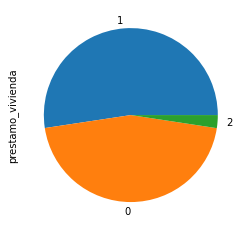

In [90]:
seri=df_filtrado.prestamo_vivienda.value_counts()
seri.plot.pie()
seri

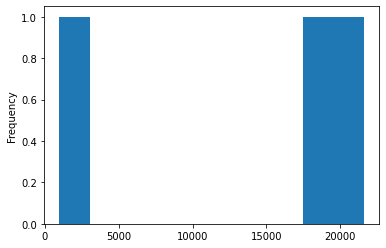

In [91]:
seri=df_filtrado.prestamo_vivienda.value_counts()
seri.plot.hist()


0    33950
1     6248
2      990
Name: prestamo_personal, dtype: int64

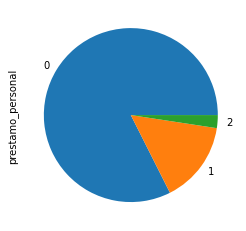

In [92]:
seri=df_filtrado.prestamo_personal.value_counts()
seri.plot.pie()
seri

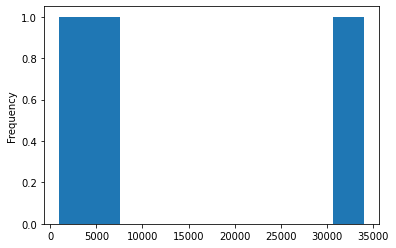

In [93]:
seri=df_filtrado.prestamo_personal.value_counts()
seri.plot.hist()


0    4712
4    4628
5    4605
7    4588
6    4567
1    4566
3    4552
2    4486
8    4484
Name: total_hijos, dtype: int64

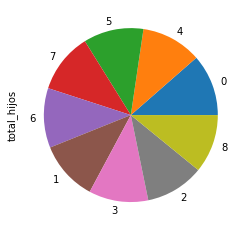

In [94]:
seri=df_filtrado.total_hijos.value_counts()
seri.plot.pie()
seri

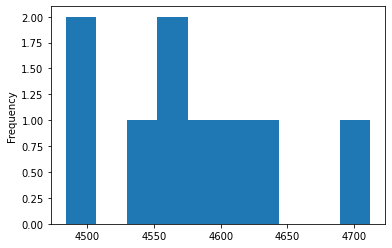

In [95]:
seri=df_filtrado.total_hijos.value_counts()
seri.plot.hist()


0    32362
2     8528
1      298
Name: credito_sin_pago, dtype: int64

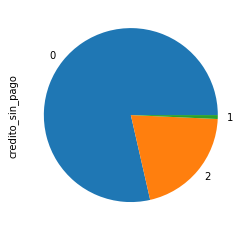

In [96]:
seri=df_filtrado.credito_sin_pago.value_counts()
seri.plot.pie()
seri

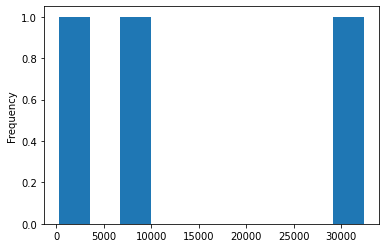

In [97]:
seri=df_filtrado.credito_sin_pago.value_counts()
seri.plot.hist()


3    6957
1    6937
2    6912
5    6864
0    6789
4    6729
Name: tarjetas_credito, dtype: int64

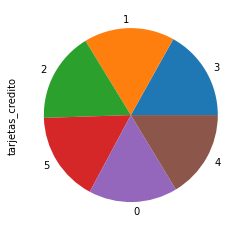

In [98]:
seri=df_filtrado.tarjetas_credito.value_counts()
seri.plot.pie()
seri

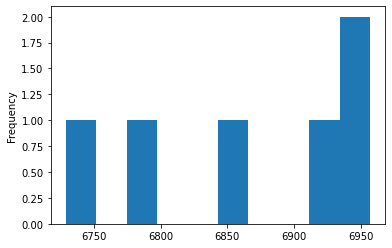

In [82]:
seri=df_filtrado.tarjetas_credito.value_counts()
seri.plot.hist()


0    36548
1     4640
Name: si_no, dtype: int64

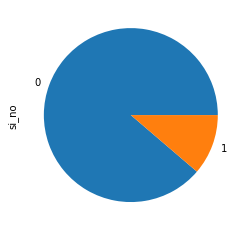

In [67]:
seri=df_filtrado.si_no.value_counts()
seri.plot.pie()
seri

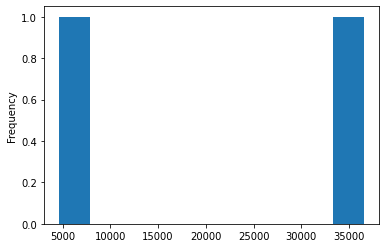

In [99]:
seri=df_filtrado.si_no.value_counts()
seri.plot.hist()


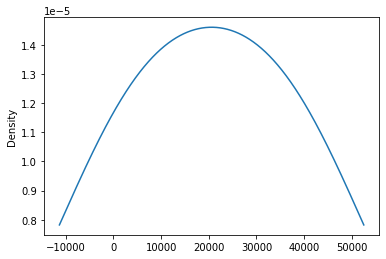

In [113]:
seri=df_filtrado.si_no.value_counts()
seri.plot.density()


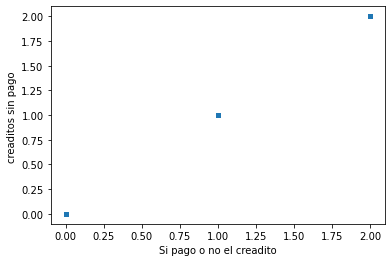

In [179]:
x = df_filtrado['si_no']
y = df_filtrado['credito_sin_pago']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('Si pago o no el creadito')
plt.ylabel('creaditos sin pago ')
plt.show()

In [194]:
x = df_filtrado.drop('credito_sin_pago',axis = 1)
y = df_filtrado.credito_sin_pago


In [202]:
x_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)


In [203]:
x = df.drop(columns='si_no')
y = df.si_no

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4,test_size=0.2)

In [205]:
regresion_logistica = LogisticRegression()


In [206]:
regresion_logistica.fit(x,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [207]:
y_prediccion = regresion_logistica.predict(x_test)


In [ ]:
exactitud = metrics.accuracy_score(y_test, y_prediccion)
print("exactitud_porcentaje= "+str(100 * exactitud))

In [208]:
exactitud = metrics.accuracy_score(y_test, y_prediccion)
print("exactitud_porcentaje= "+str(100 * exactitud))

exactitud_porcentaje= 89.1964068948774
